In [1]:
from PIL import Image
import os
import versatile_diffusion
from versatile_diffusion import DDIMSampler, model_cfg_bank, get_model, Reconstructor
import torch

In [15]:
reconstructor = Reconstructor(device='cuda:0', cache_dir='../cache', ddim_steps=20)

Reconstructor: Loading model... fp16:  True

#######################
# Running in eps mode #
#######################

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Load pth from ../cache/kl-f8.pth
Load autoencoderkl with total 83653863 parameters,72921.759 parameter sum.
Load optimus_bert_connector with total 109489920 parameters,19195.846 parameter sum.
Load optimus_gpt2_connector with total 132109824 parameters,18987.968 parameter sum.
Load pth from ../cache/optimus-vae.pth
Load optimus_vae_next with total 241599744 parameters,-344611.688 parameter sum.


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Load clip_image_context_encoder with total 427616513 parameters,64007.510 parameter sum.


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Load clip_text_context_encoder with total 427616513 parameters,64007.510 parameter sum.
Load openai_unet_2d_next with total 859520964 parameters,100258.127 parameter sum.
Load openai_unet_0d_next with total 1706797888 parameters,250420.288 parameter sum.
Load vd_v2_0 with total 3746805485 parameters,207003.506 parameter sum.


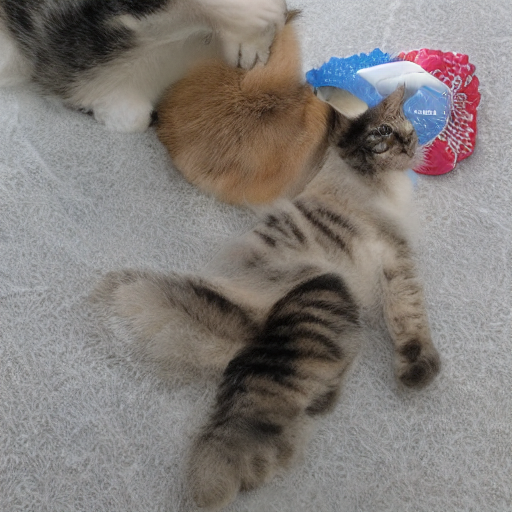

In [16]:
prompt_im = Image.open('/home/naxos2-raid25/kneel027/home/kneel027/IP-Adapter/assets/images/woman.png')
text_clip = reconstructor.embed_text("A cat")
image_clip = reconstructor.embed_image(prompt_im)
reconstruction = reconstructor.reconstruct(c_t=text_clip)
# reconstruction = reconstructor.reconstruct(c_i=image_clip, c_t=text_clip)
reconstruction
# reconstruction2 = reconstructor.reconstruct(image=reconstruction, c_t=text_clip, strength=0.85)
# reconstruction2